<a href="https://colab.research.google.com/github/hollyemblem/Recommenders/blob/main/Similarity_Measures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, I examine some of the maths behind similarity measures, mentioned by Kim Falk in Practical Recommender Systems, specifically:

- L1/Manhattan distance
- L2/Euclidean distance
- Cosine Similarity
- Pearson Similarity
- A "quirk" (using the term loosely of the Cosine similarity with few ratings compared to Pearson)


#### L1 Norm
@Todo

#### L2 Norm
@Todo

#### Cosine Similarity

This is incredibly intuitive, and is summarised by Falk as follows:

"You can measure similarity by looking at the angles between the rating vectors."

Giving a bit more detail, the cosine similarity specifically entails measuring the similarity of two vectors within an inner product space (Jiawei Han, et al. Data Mining (Third Edition), 2012). It can be visualised as follows:


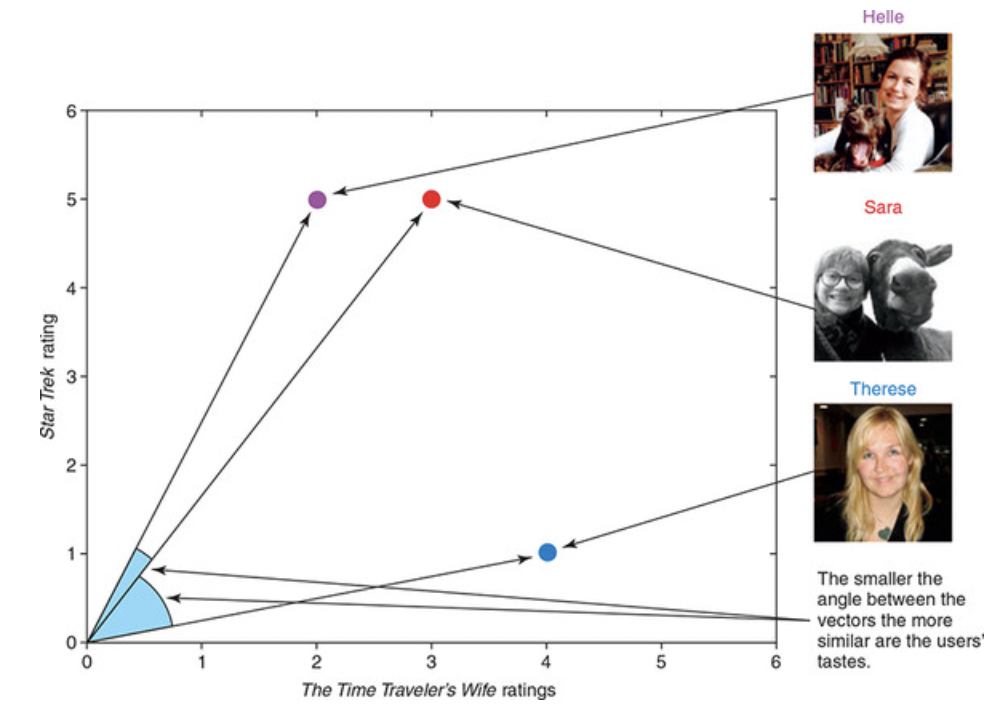


_Image from Kim Falk's Practical Recommender Systems_

This is incredibly intuitive, as ratings when the angle is tiny, the users' tastes are very similar. When the angle is very wide, e.g. a right angle, we know that these users are not very similar at all. The mapping of ratings as vectors into this space is just very smart.

Examining _how_ this happens, cosine similarity can be calculated as follows:

$\frac{x \cdot y}{\|x\| \|y\|}$
_From: https://www.geeksforgeeks.org/cosine-similarity/_

This notation differs slightly from Falk's, but it comes down to calculating the dot product of the vectors and then dividing by length of $x$ * length of $y$.

This can be shown even more clearly as follows:


$\frac{\sum\limits_{\substack{i=1 \\ }}^{n} x_i y_i}{\sqrt{\sum\limits_{\substack{i=1 \\ }}^{n} x_i^{2}} \sqrt{\sum\limits_{\substack{i=1 \\ }}^{n} y_i^{2}}}$

We can also try this with a small real world example, first by working it out ourselves, and then using Numpy.

Let us have the following vectors, representing user ratings:


- User A: \{1, 5, 3}
- User B: {5,0,1}

From here, we first need to calculate the dot product of the vectors:

(1*5 + 0*5 + 3*1) = 8

And then the length of the vectors:

- $\left\| \mathbf{User A} \right\|$ = sqrt((1)^2+(5)^2+(3)^2) = 5.9160797831
- $\left\| \mathbf{User B} \right\|$ = sqrt((5)^2+(0)^2+(1)^2)) = 5.09901951359

And then finally, making the dot product the numerator and lengths the denominator:

8 / (5.9160797831 * 5.09901951359) = 0.26519741765


##### Numpy Example

Following that worked example, we can then implement the same equation in code and verify our results. The example listed here (https://stackoverflow.com/questions/18424228/cosine-similarity-between-2-number-lists) provides a method for calculating the cosine similarity, and we can also try Sk-Learn's. In both instances, we see our values match 😎

In [5]:
from numpy import dot
from numpy.linalg import norm

a = [1,5,3]
b = [5,0,1]

dot(a, b)/(norm(a)*norm(b))

0.26519741765271837

In [6]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([a], [b])

array([[0.26519742]])

#### Pearson's Correlation Coefficient
@Todo